In [ ]:
%pip install -r requirements.txt

In [ ]:
!python -m visdom.server

In [ ]:
!start http://localhost:8097/

In [ ]:
!python train.py --dataroot ./datasets/gif/ --name gif_64 --no_flip --norm batch --model vec2pic --dataset_mode vec2pic --load_size 64 --crop_size 64 --sig 0.1 --netD_pic n_layers --n_layers_D 3 --display_freq 5 --n_epochs 200 --lr 1e-5 --netG ffnet_n_layers --n_layers_G 15

In [ ]:
python create_test.py --dataroot ./datasets/gif/ --name gif_test_x32! --no_flip --norm batch --norm batch --model vec2pic --dataset_mode vec2pic --load_size 32 --crop_size 32 --netG ffnet_n_layers --n_layers_G 15 --batch_size 280 --no_flip --gpu_ids -1

In [1]:
import os
import torch
# define a function to load the model and dataset from dir
def load_model_and_dataset(dir):
    G_A = torch.load(os.path.join(dir, 'netG_A.pth'))
    G_B = torch.load(os.path.join(dir, 'netG_B.pth'))
    dataset = torch.load(os.path.join(dir, 'dataset.pth'))
    return G_A, G_B, dataset

In [2]:
G_A, G_B, dataset = load_model_and_dataset('./results/gif_64/')
import numpy as np
import matplotlib.pyplot as plt


In [15]:
import re
import numpy as np
import matplotlib.pyplot as plt

def get_numbers_after_backslash(input_string):
    numbers = re.findall(r'\\(\d+)', input_string)
    return numbers

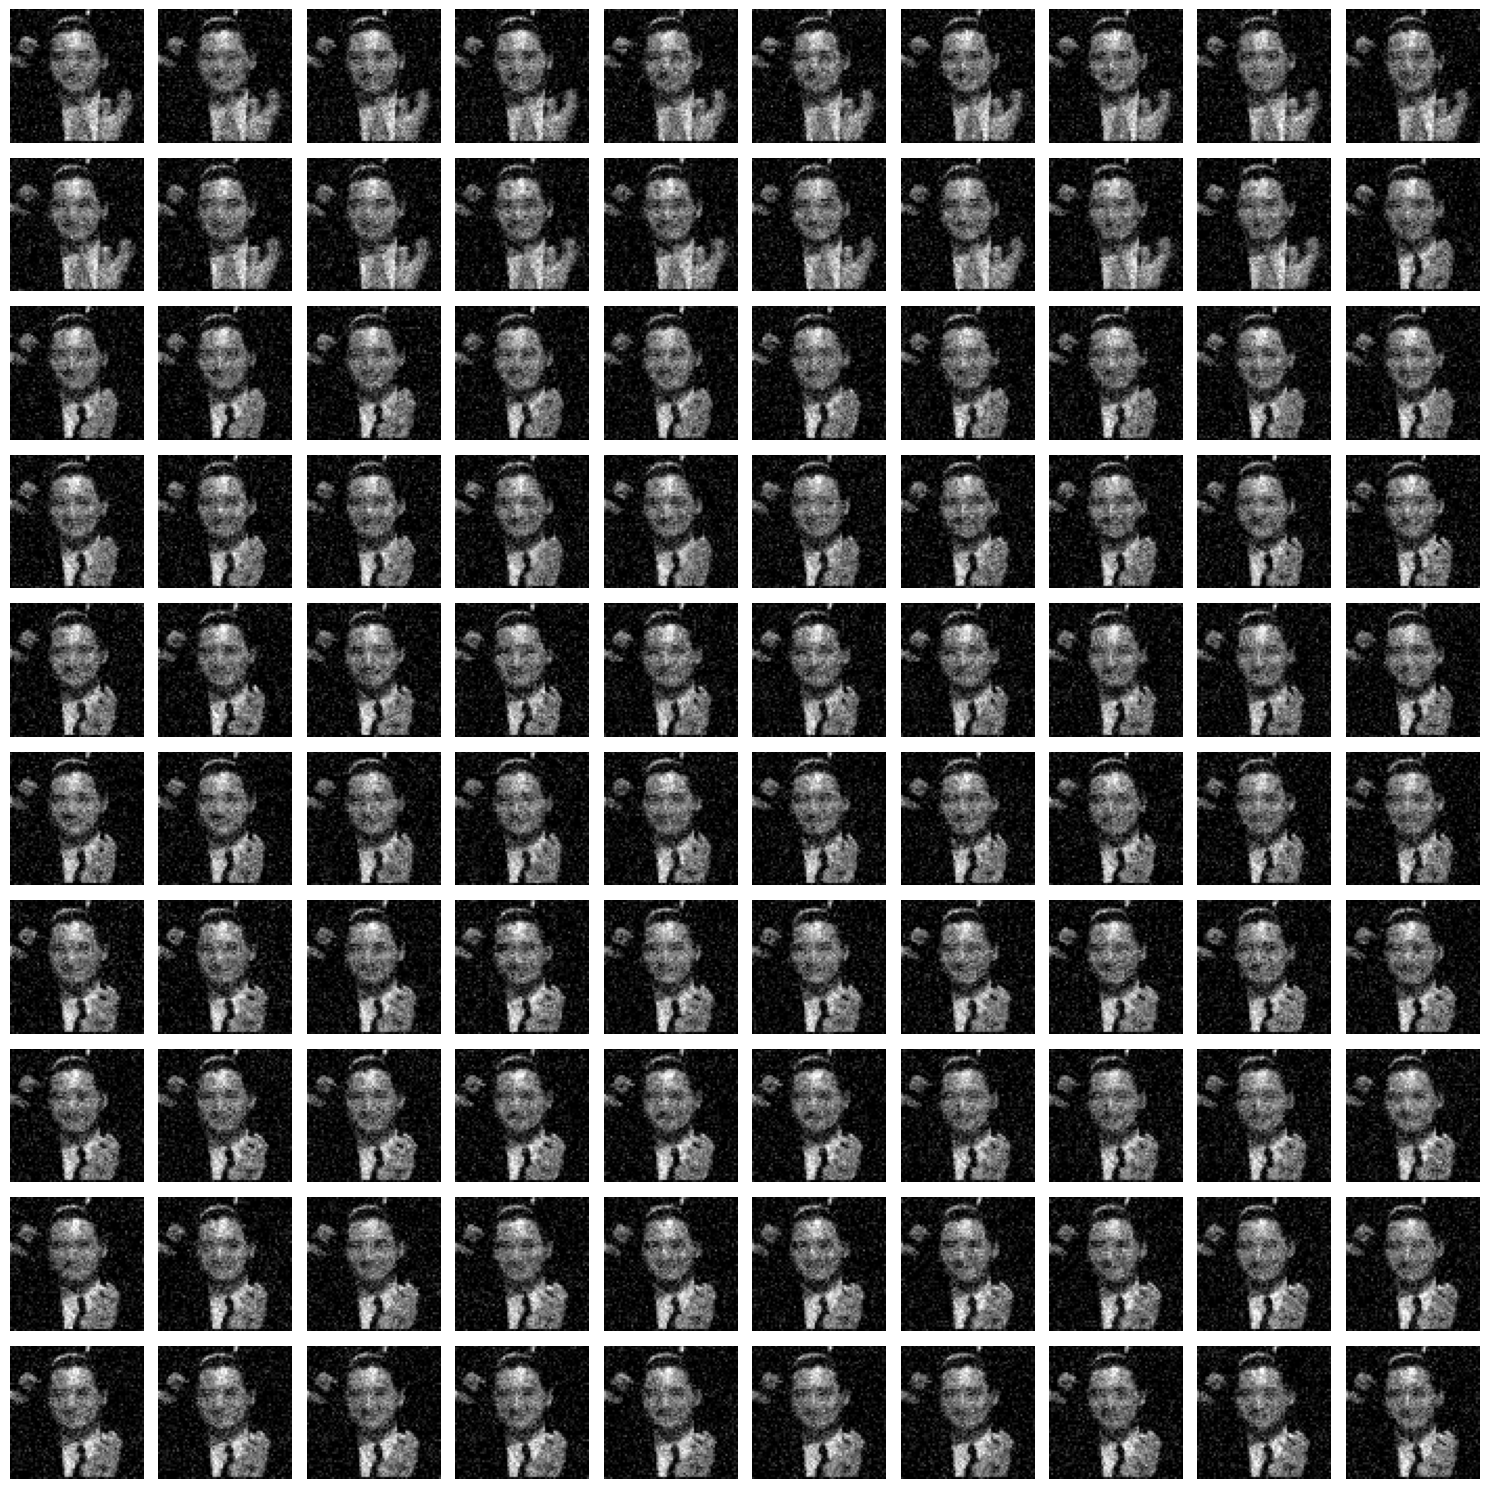

(14, 64, 64)


In [27]:
for batch in dataset:
        pass

images_tensor = batch['B']
images_names = batch['B_paths']

images_index = [get_numbers_after_backslash(name)[0] for name in images_names]
images_index = [int(i) for i in images_index]
images_order = np.argsort(images_index)
images_tensor = images_tensor[images_order]
unique_index = [i*20 for i in range(14)]


images_tensor = images_tensor[unique_index]
n = images_tensor.size(0)
images = images_tensor.reshape(n, 64, 64).detach().numpy()
print(images.shape)

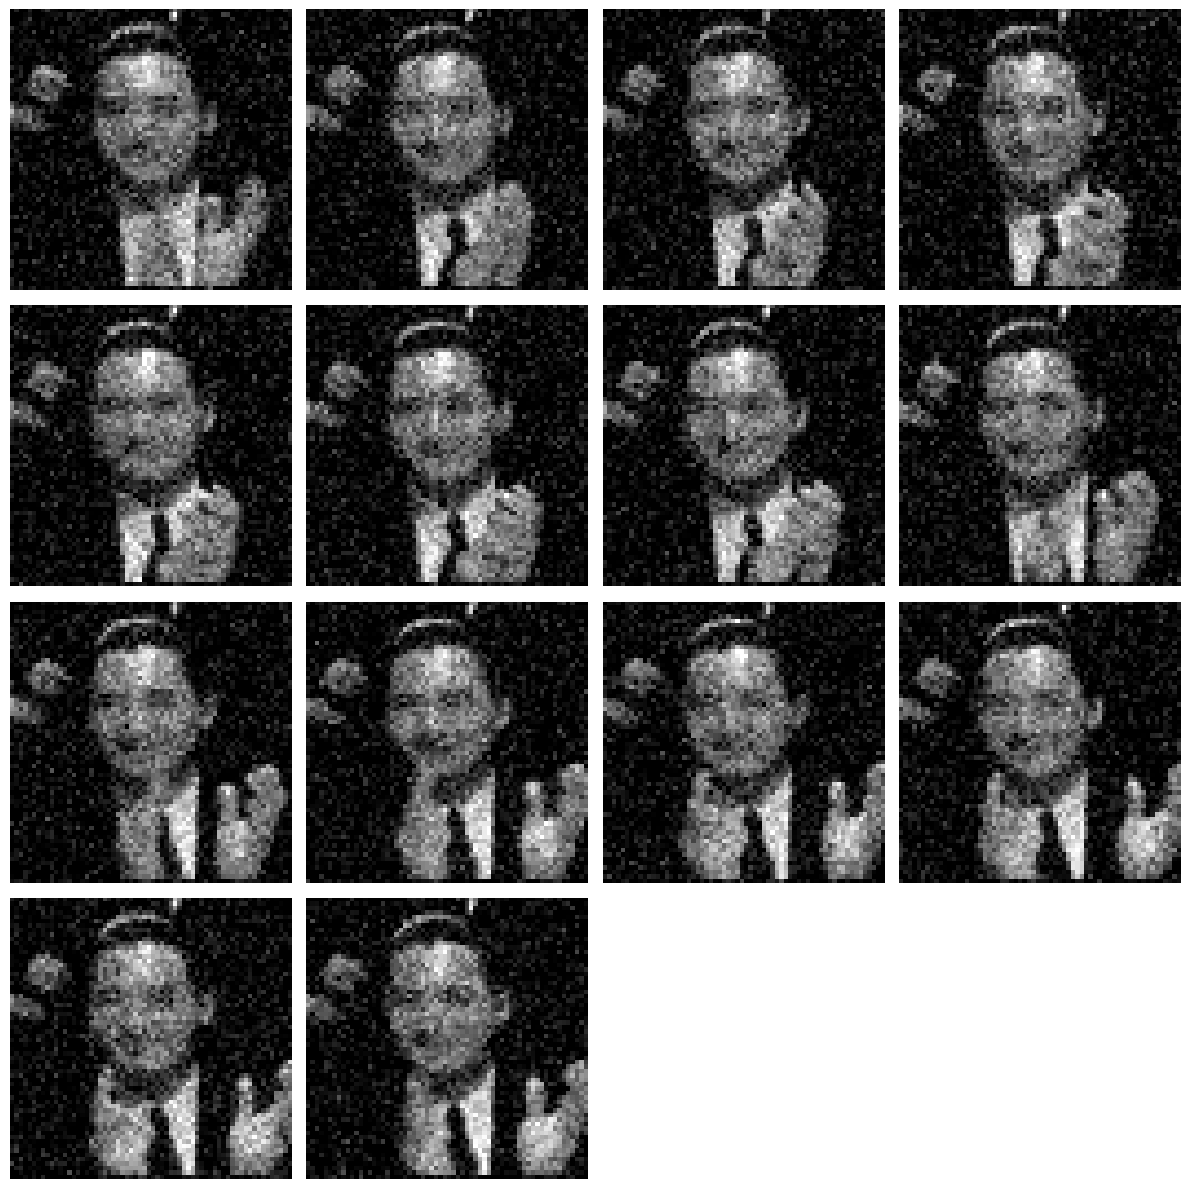

In [28]:

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()
for i in range(14):
    ax = axes[i]
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
if len(axes) > 14:
    for j in range(14, len(axes)):
        fig.delaxes(axes[j])

fig.tight_layout()
plt.show()


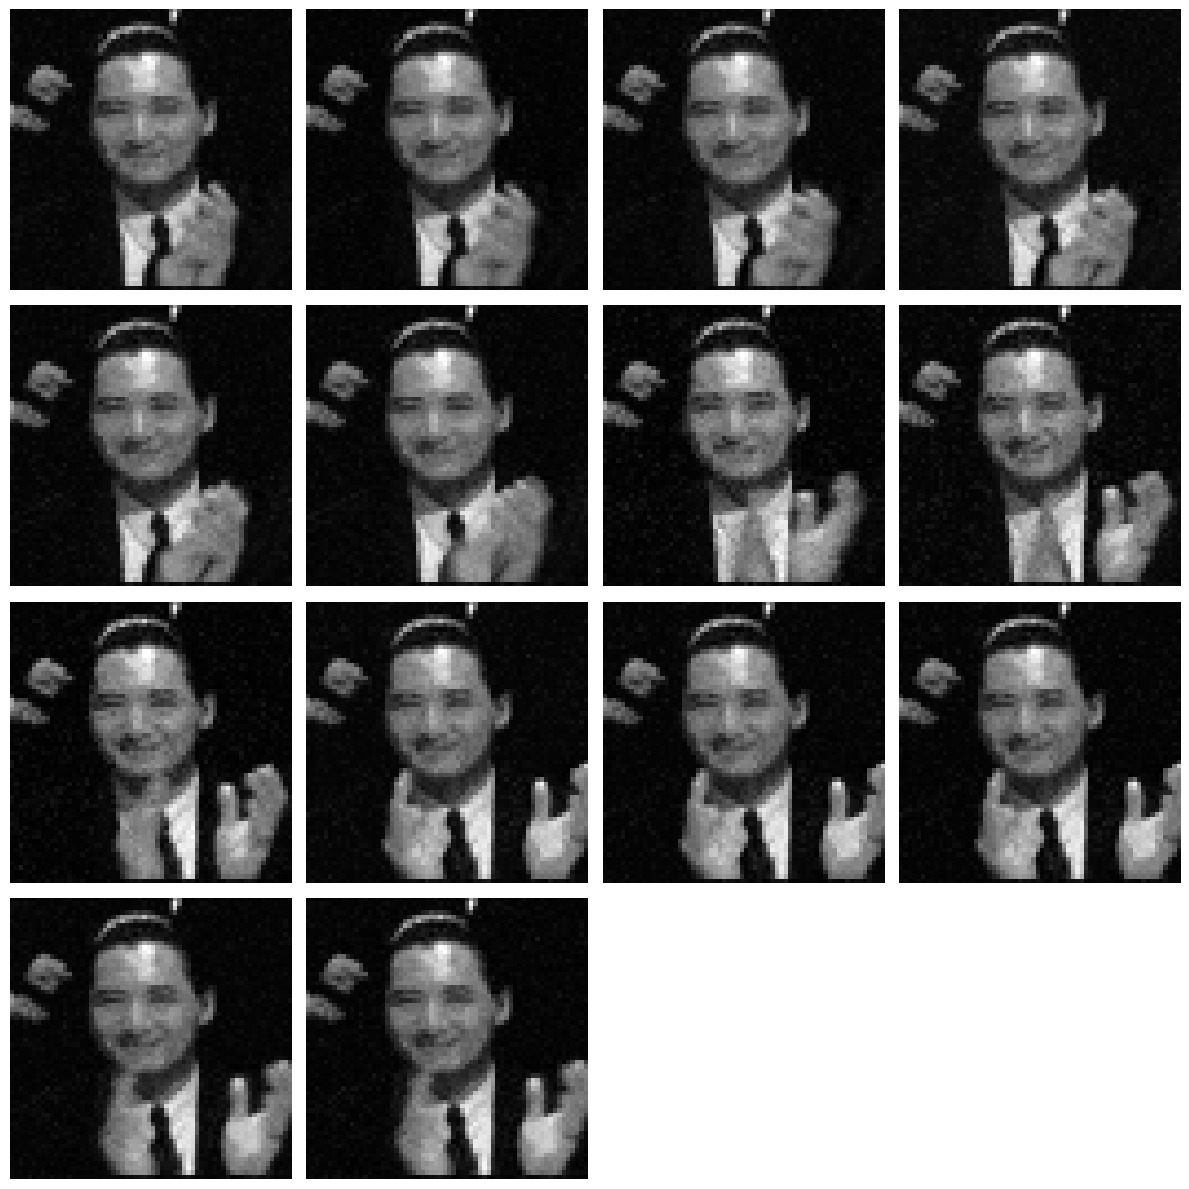

In [31]:
Codes = G_B(images_tensor)
GG_images = G_A(Codes)
GG_images = GG_images.reshape(14, 64, 64).detach().numpy()
order = np.argsort(Codes.detach().numpy()[:, 0])
ordered_images = GG_images[order]


fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()
for i in range(14):
    ax = axes[i]
    ax.imshow(ordered_images[i], cmap='gray')
    ax.axis('off')
if len(axes) > 14:
    for j in range(14, len(axes)):
        fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

14


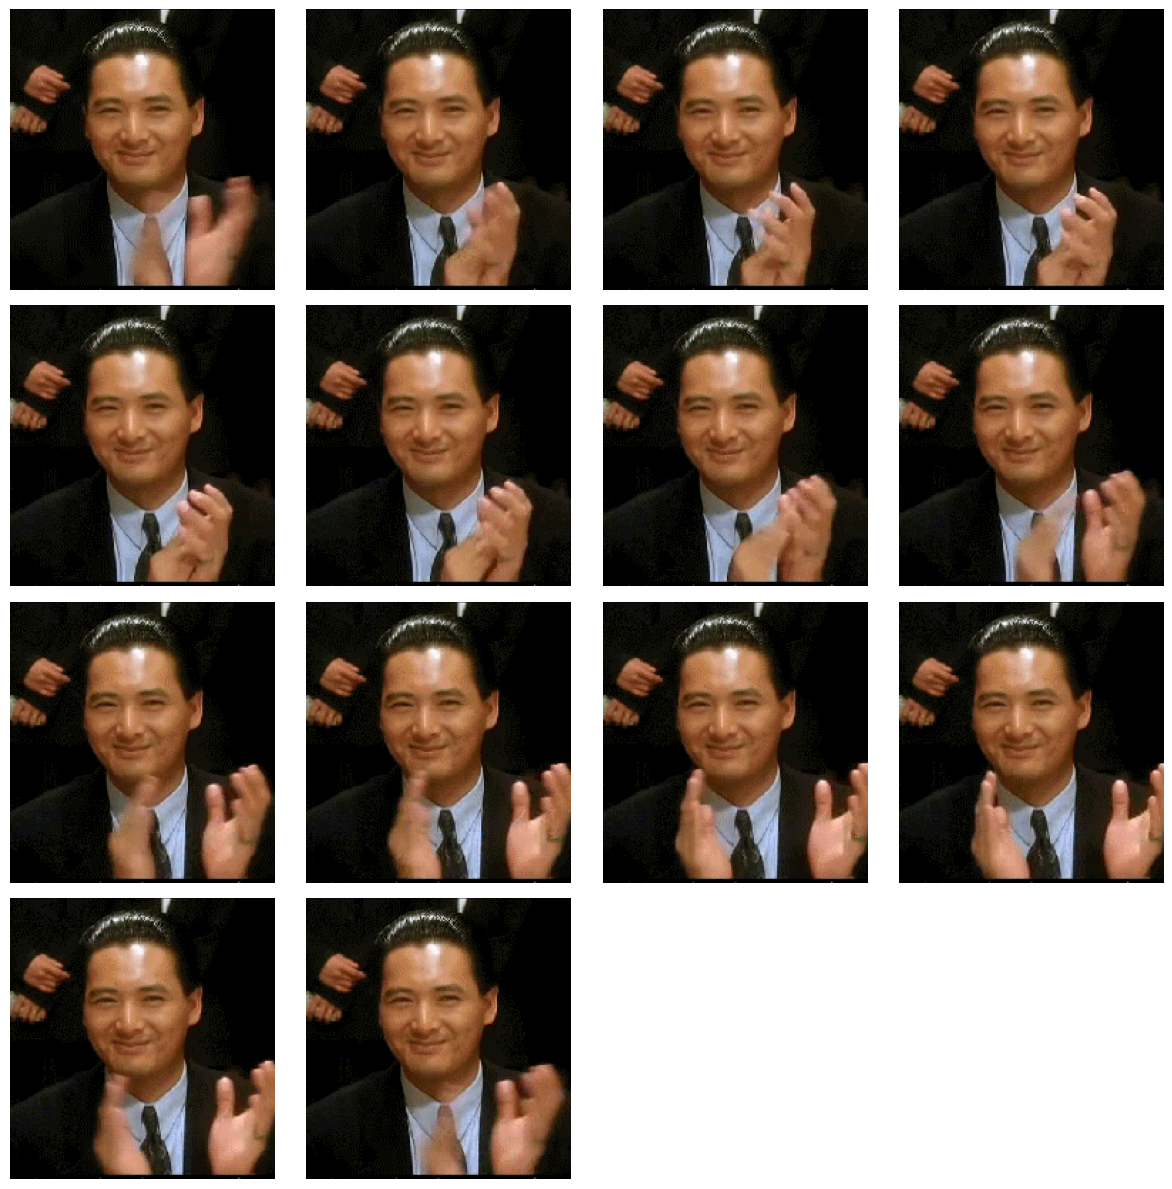

In [30]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set the directory containing the GIF images
dir_path = 'Create_real_data/1/frames/'

# Get a list of all files in the directory
file_list = os.listdir(dir_path)

# Filter the file list to include only GIF images
gif_files = [Image.open(os.path.join(dir_path,str(i)+'.gif')).convert('RGB') for i in range(14)]
print(len(gif_files))

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()
for i in range(14):
    ax = axes[i]
    ax.imshow(gif_files[i])
    ax.axis('off')
if len(axes) > 14:
    for j in range(14, len(axes)):
        fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

